#### ALFIDO TECH INTERNSHIP TASK NO 3 :

# MOVIE RATING PREDICTION

#### PROBLEM STATEMENT
Movie Rating Prediction is a project where you aim to build a recommendation system that predicts how a user would rate a movie based on their historical ratings and the ratings of similar users. You can use techniques like collaborative filtering or content-based recommendation to accomplish this.

### ABOUT DATASET
Other
movies.dat(171.31 kB)
About this file
RATINGS FILE DESCRIPTION
All ratings are contained in the file "ratings.dat" and are in the
following format:

UserID::MovieID::Rating::Timestamp

UserIDs range between 1 and 6040
MovieIDs range between 1 and 3952
Ratings are made on a 5-star scale (whole-star ratings only)
Timestamp is represented in seconds since the epoch as returned by time(2)
Each user has at least 20 ratings
USERS FILE DESCRIPTION
User information is in the file "users.dat" and is in the following
format:

UserID::Gender::Age::Occupation::Zip-code

All demographic information is provided voluntarily by the users and is
not checked for accuracy. Only users who have provided some demographic
information are included in this data set.

Gender is denoted by a "M" for male and "F" for female

Age is chosen from the following ranges:

1: "Under 18"
18: "18-24"
25: "25-34"
35: "35-44"
45: "45-49"
50: "50-55"
56: "56+"
Occupation is chosen from the following choices:

0: "other" or not specified
1: "academic/educator"
2: "artist"
3: "clerical/admin"
4: "college/grad student"
5: "customer service"
6: "doctor/health care"
7: "executive/managerial"
8: "farmer"
9: "homemaker"
10: "K-12 student"
11: "lawyer"
12: "programmer"
13: "retired"
14: "sales/marketing"
15: "scientist"
16: "self-employed"
17: "technician/engineer"
18: "tradesman/craftsman"
19: "unemployed"
20: "writer"
MOVIES FILE DESCRIPTION
Movie information is in the file "movies.dat" and is in the following
format:

MovieID::Title::Genres

Titles are identical to titles provided by the IMDB (including
year of release)

Genres are pipe-separated and are selected from the following genres:

Action
Adventure
Animation
Children's
Comedy
Crime
Documentary
Drama
Fantasy
Film-Noir
Horror
Musical
Mystery
Romance
Sci-Fi
Thriller
War
Western
Some MovieIDs do not correspond to a movie due to accidental duplicate
entries and/or test entries

Movies are mostly entered by hand, so errors and inconsistencies may exist

#### IMPORTING THE IMPORTANT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Data acquisition of the MOVIE dataset
df_movie=pd.read_csv('movies.dat', sep = '::', engine='python', encoding='latin1')
df_movie.columns =['MovieIDs','MovieName','Category']
df_movie.dropna(inplace=True)
df_movie.head()

,MovieIDs,MovieName,Category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [3]:
df_movie.shape

(3882, 3)

In [4]:
#Data acquisition of the rating dataset
df_rating = pd.read_csv("ratings.dat",sep='::', engine='python', encoding='latin1')
df_rating.columns =['ID','MovieID','Ratings','TimeStamp']
df_rating.dropna(inplace=True)
df_rating.head()

,ID,MovieID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [5]:
df_rating.shape

(1000208, 4)

In [6]:
#Data acquisition of the users dataset
df_user = pd.read_csv("users.dat",sep='::',engine='python', encoding='latin1')
df_user.columns =['UserID','Gender','Age','Occupation','Zip-code']
df_user.dropna(inplace=True)
df_user.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [7]:
df_user.shape

(6039, 5)

In [8]:
# Merge User and Ratings data on 'MovieID'
User_ratings = pd.merge(df_user, df_rating, left_on='UserID', right_on='ID')

# Display the merged DataFrame
User_ratings.head()

,UserID,Gender,Age,Occupation,Zip-code,ID,MovieID,Ratings,TimeStamp
0,2,M,56,16,70072,2,1357,5,978298709
1,2,M,56,16,70072,2,3068,4,978299000
2,2,M,56,16,70072,2,1537,4,978299620
3,2,M,56,16,70072,2,647,3,978299351
4,2,M,56,16,70072,2,2194,4,978299297


In [9]:
df = pd.merge(User_ratings, df_movie, left_on='MovieID', right_on='MovieIDs')
df.head()

,UserID,Gender,Age,Occupation,Zip-code,ID,MovieID,Ratings,TimeStamp,MovieIDs,MovieName,Category
0,2,M,56,16,70072,2,1357,5,978298709,1357,Shine (1996),Drama|Romance
1,8,M,25,12,11413,8,1357,4,978230800,1357,Shine (1996),Drama|Romance
2,10,F,35,1,95370,10,1357,5,978227625,1357,Shine (1996),Drama|Romance
3,18,F,18,3,95825,18,1357,5,978156876,1357,Shine (1996),Drama|Romance
4,33,M,45,3,55421,33,1357,4,978109488,1357,Shine (1996),Drama|Romance


In [10]:
df = df.drop(['ID', 'MovieIDs'], axis= 1)

In [11]:
df.head()

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Ratings,TimeStamp,MovieName,Category
0,2,M,56,16,70072,1357,5,978298709,Shine (1996),Drama|Romance
1,8,M,25,12,11413,1357,4,978230800,Shine (1996),Drama|Romance
2,10,F,35,1,95370,1357,5,978227625,Shine (1996),Drama|Romance
3,18,F,18,3,95825,1357,5,978156876,Shine (1996),Drama|Romance
4,33,M,45,3,55421,1357,4,978109488,Shine (1996),Drama|Romance


In [12]:
df.shape

(998080, 10)

In [13]:
df.isnull().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
MovieID       0
Ratings       0
TimeStamp     0
MovieName     0
Category      0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998080 entries, 0 to 998079
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   UserID      998080 non-null  int64 
 1   Gender      998080 non-null  object
 2   Age         998080 non-null  int64 
 3   Occupation  998080 non-null  int64 
 4   Zip-code    998080 non-null  object
 5   MovieID     998080 non-null  int64 
 6   Ratings     998080 non-null  int64 
 7   TimeStamp   998080 non-null  int64 
 8   MovieName   998080 non-null  object
 9   Category    998080 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.8+ MB


In [15]:
df.describe()

,UserID,Age,Occupation,MovieID,Ratings,TimeStamp
count,998080.000000,998080.000000,998080.000000,998080.000000,998080.000000,9.980800e+05
mean,3024.608884,29.744052,8.035970,1869.434325,3.580357,9.722469e+08
std,1728.273821,11.749987,6.531805,1093.878797,1.117300,1.215794e+07
min,2.000000,1.000000,0.000000,2.000000,1.000000,9.567039e+08
25%,1506.000000,25.000000,2.000000,1034.000000,3.000000,9.653027e+08
50%,3070.000000,25.000000,7.000000,1845.000000,4.000000,9.730190e+08
75%,4476.000000,35.000000,14.000000,2772.000000,4.000000,9.752211e+08
max,6040.000000,56.000000,20.000000,3952.000000,5.000000,1.046455e+09


In [16]:
df.nunique()

UserID          6039
Gender             2
Age                7
Occupation        21
Zip-code        3439
MovieID         3705
Ratings            5
TimeStamp     457969
MovieName       3705
Category         301
dtype: int64

In [17]:

# drop zip-code and timestamps

df = df.drop(['Zip-code', 'TimeStamp'], axis= 1)

In [18]:
df.head()

,UserID,Gender,Age,Occupation,MovieID,Ratings,MovieName,Category
0,2,M,56,16,1357,5,Shine (1996),Drama|Romance
1,8,M,25,12,1357,4,Shine (1996),Drama|Romance
2,10,F,35,1,1357,5,Shine (1996),Drama|Romance
3,18,F,18,3,1357,5,Shine (1996),Drama|Romance
4,33,M,45,3,1357,4,Shine (1996),Drama|Romance


### EXPLORATARY DATA ANALYSIS

In [19]:
# movie count vs ratings
rating_count = df.groupby('MovieID')['Ratings'].count()
rating_count.sort_values(ascending=False)

MovieID
2858    3428
1196    2990
260     2990
1210    2883
480     2672
        ... 
3237       1
763        1
624        1
2563       1
3290       1
Name: Ratings, Length: 3705, dtype: int64

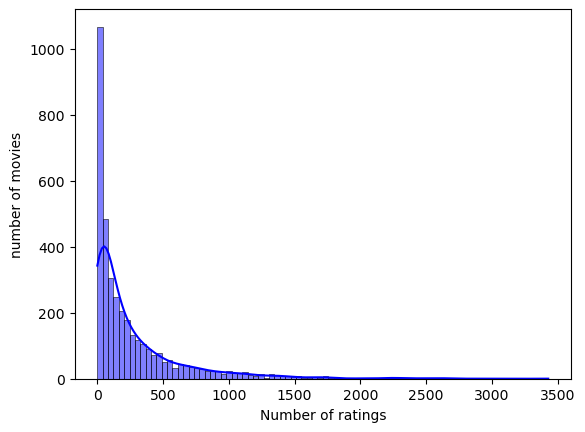

In [20]:
sns.histplot(rating_count, kde=True,color="b")
plt.xlabel('Number of ratings')
plt.ylabel('number of movies')
plt.show()

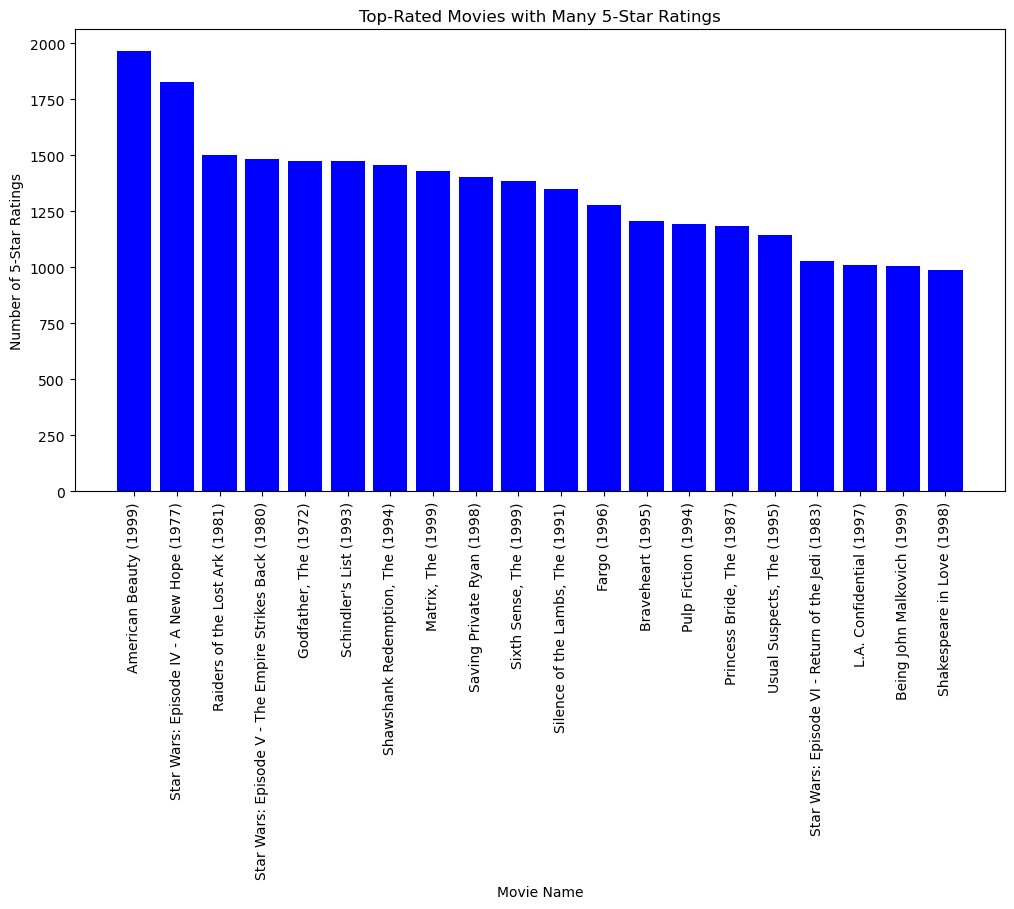

In [21]:
# Group by movie MovieName and count 5-star ratings
movie_ratings = df[df['Ratings'] == 5].groupby('MovieName')['Ratings'].count().reset_index()

# Movies with the highest ratings
top_rated_movies = movie_ratings.sort_values(by='Ratings', ascending=False)

# bar plot for the top-rated movies
plt.figure(figsize=(12, 6))
plt.bar(top_rated_movies['MovieName'][:20], top_rated_movies['Ratings'][:20], color='b')
plt.xlabel('Movie Name')
plt.ylabel('Number of 5-Star Ratings')
plt.title('Top-Rated Movies with Many 5-Star Ratings')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

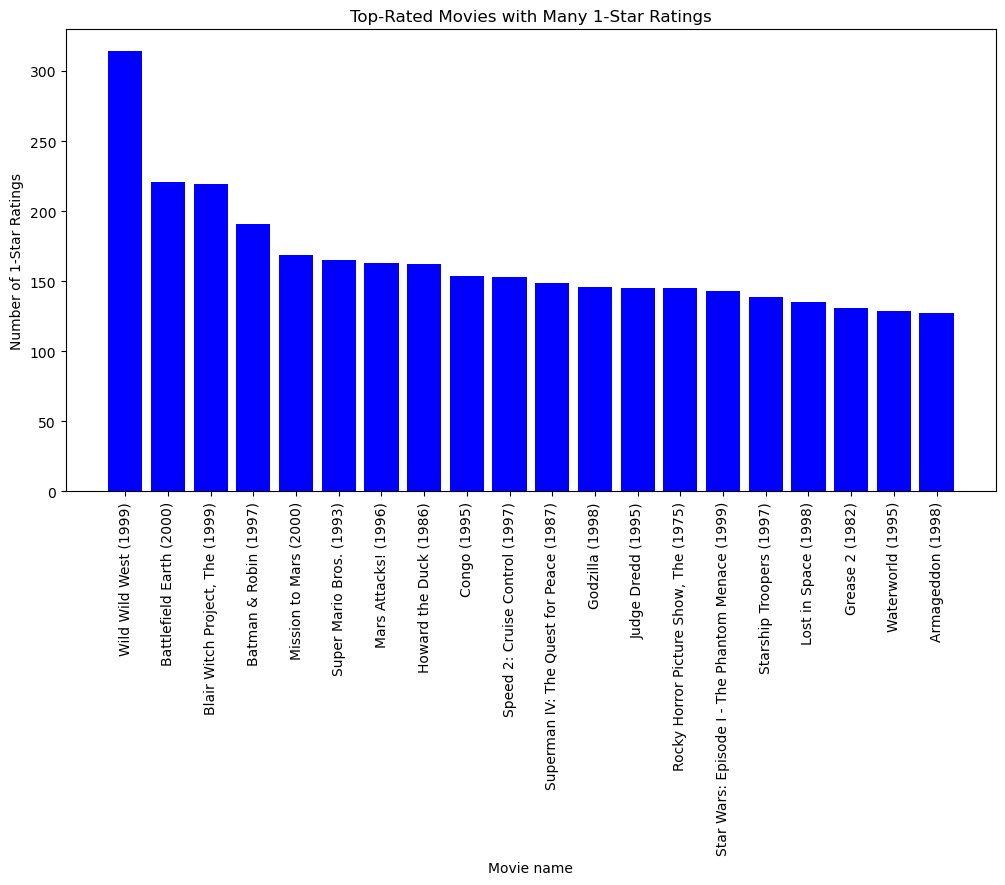

In [22]:
# Group by movie MovieName and count 1-star ratings
movie_ratings = df[df['Ratings'] == 1].groupby('MovieName')['Ratings'].count().reset_index()

# Movies with the highest ratings
top_rated_movies = movie_ratings.sort_values(by='Ratings', ascending=False)

# bar plot for the top-rated movies
plt.figure(figsize=(12, 6))
plt.bar(top_rated_movies['MovieName'][:20], top_rated_movies['Ratings'][:20], color='b')
plt.xlabel('Movie name')
plt.ylabel('Number of 1-Star Ratings')
plt.title('Top-Rated Movies with Many 1-Star Ratings')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


In [23]:
df.Category.value_counts()

Comedy                       116880
Drama                        111411
Comedy|Romance                42712
Comedy|Drama                  42244
Drama|Romance                 29169
                              ...  
Drama|Romance|Western            29
Children's|Fantasy               27
Comedy|Film-Noir|Thriller         5
Film-Noir|Horror                  2
Fantasy                           1
Name: Category, Length: 301, dtype: int64

In [24]:
# df = df[~df[df['Category']=='Film-Noir|Horror']]
df = df[~df['Category'].str.contains('Film-Noir|Horror')]
df.Category.value_counts()

Comedy                       116880
Drama                        111411
Comedy|Romance                42712
Comedy|Drama                  42244
Drama|Romance                 29169
                              ...  
Animation|Mystery                41
Adventure|Musical|Romance        30
Drama|Romance|Western            29
Children's|Fantasy               27
Fantasy                           1
Name: Category, Length: 254, dtype: int64

In [25]:
df.columns

Index(['UserID', 'Gender', 'Age', 'Occupation', 'MovieID', 'Ratings',
       'MovieName', 'Category'],
      dtype='object')

### User-Based Collaborative Filtering
User-Based Collaborative Filtering (UBCF) is a recommendation technique that provides personalized recommendations 
to users based on the historical behavior and preferences of other users who are similar to them. UBCF assumes that 
users who have interacted with items in similar ways (e.g., rated movies similarly) are likely to have similar tastes 
and can benefit from recommendations made to each other.

In [26]:
!pip install scikit-surprise

In [27]:
# Import necessary libraries
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy

# Load data into Surprise Dataset
data = df
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(data[['UserID', 'MovieName', 'Ratings']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2)

# Define the user-based collaborative filtering model
sim_options = {
    'user_based': True,  # Use user-based collaborative filtering
    'name': 'cosine',
}
model = KNNBasic(sim_options=sim_options)

# Fit the model on the training data
model.fit(trainset)

# Predict ratings on the test set
predictions = model.test(testset)

# Evaluate the model using RMSE
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9710
RMSE: 0.9710053173930978


In [28]:
df.sample(3)

,UserID,Gender,Age,Occupation,MovieID,Ratings,MovieName,Category
892161,1266,M,25,4,1913,4,Picnic at Hanging Rock (1975),Drama|Mystery
109227,5087,F,25,6,920,5,Gone with the Wind (1939),Drama|Romance|War
267580,6019,M,25,0,1089,5,Reservoir Dogs (1992),Crime|Thriller


In [29]:
# Testing on custom data
user_id_to_predict = int(input())  # Replace with a user ID from your dataset
movie_name_to_predict = input()  # Replace with a movie name
custom_prediction = model.predict(user_id_to_predict, movie_name_to_predict).est
print(f"Predicted rating for user {user_id_to_predict} and movie {movie_name_to_predict}: {custom_prediction}")


6019
Reservoir Dogs 
Predicted rating for user 6019 and movie Reservoir Dogs : 3.6008235235517776


### Item-Based Collaborative Filtering
Item-Based Collaborative Filtering (IBCF) is a recommendation technique that suggests items (e.g., movies) 
to users based on the similarity of items rather than users. In IBCF, the idea is to recommend items that are 
similar to the ones the user has interacted with in the past. This method leverages the assumption that users 
who liked or interacted with one item are likely to appreciate items that are similar to it.

In [30]:
# Import necessary libraries
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy

In [31]:
# Load data into Surprise Dataset
data = df
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(data[['UserID', 'MovieName', 'Ratings']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2)

# Define the item-based collaborative filtering model
sim_options = {
    'user_based': False,  # Use item-based collaborative filtering
    'name': 'cosine',
}
model = KNNBasic(sim_options=sim_options)

# Fit the model on the training data
model.fit(trainset)

# Predict ratings on the test set
predictions = model.test(testset)

# Evaluate the model using RMSE
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9901
RMSE: 0.9900967200129184


In [32]:
df.sample(3)

,UserID,Gender,Age,Occupation,MovieID,Ratings,MovieName,Category
156149,4226,F,35,6,2355,5,"Bug's Life, A (1998)",Animation|Children's|Comedy
375442,588,F,25,11,720,5,Wallace & Gromit: The Best of Aardman Animatio...,Animation
181205,3005,M,25,17,3702,4,Mad Max (1979),Action|Sci-Fi


In [33]:
# Testing on custom data
user_id_to_predict = int(input())  # Replace with a user ID from your dataset
movie_name_to_predict = input()  # Replace with a movie name
custom_prediction = model.predict(user_id_to_predict, movie_name_to_predict).est
print(f"Predicted rating for user {user_id_to_predict} and movie {movie_name_to_predict}: {custom_prediction}")

3005
mad max
Predicted rating for user 3005 and movie mad max: 3.600581392131144


### Matrix Factorization Techniques
Matrix Factorization is a class of techniques used in recommendation systems and data analysis that factorizes a matrix 
into multiple matrices to capture latent features and relationships between data points. Matrix factorization methods 
are widely used in collaborative filtering-based recommendation systems

In [34]:
# Import necessary libraries
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split, GridSearchCV
from surprise import accuracy

In [35]:
# Load data into Surprise Dataset
data = df
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(data[['UserID', 'MovieName', 'Ratings']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2)

# Hyperparameter tuning (example: tuning n_factors)
param_grid = {'n_factors': [10, 20, 30]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5)
gs.fit(data)

# Get the best model
best_model = gs.best_estimator['rmse']

# Train the best model
best_model.fit(trainset)

# Predict ratings on the test set
predictions = best_model.test(testset)

# Evaluate the model using RMSE
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")

RMSE: 0.8690
RMSE: 0.8689925666410769


In [36]:
df.sample(3)

,UserID,Gender,Age,Occupation,MovieID,Ratings,MovieName,Category
82249,3464,F,25,14,593,5,"Silence of the Lambs, The (1991)",Drama|Thriller
233454,1980,M,35,7,2291,4,Edward Scissorhands (1990),Drama|Romance
189649,3903,M,25,0,1240,5,"Terminator, The (1984)",Action|Sci-Fi|Thriller


In [37]:
# Testing on custom data
user_id_to_predict = int(input())  # Replace with a user ID from your dataset
movie_name_to_predict = input()  # Replace with a movie name
custom_prediction = best_model.predict(user_id_to_predict, movie_name_to_predict).est
print(f"Predicted rating for user {user_id_to_predict} and movie {movie_name_to_predict}: {custom_prediction}")

1980
Edward Scissorhands
Predicted rating for user 1980 and movie Edward Scissorhands: 3.5430046969407907
